## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_rows', 500)

## train.csv

- **row_id: (int64)** ID строки
- **timestamp: (int64)** время в милисекундах между началом сессии и завершением задания юзером
- **user_id: (int32)** ID юзера
- **content_id: (int16)** ID вопроса/лекции
- **content_type_id: (int8)** 0 - вопрос(ы), 1 - лекция
- **task_container_id: (int16)** ID блока вопросов или лекции (может включать в себя несколько content_id)
- **user_answer: (int8)** ответ юзера на вопрос. -1 - пустое значение для лекций
- **answered_correctly: (int8)** 1 -ответил верно, 0 -неверно, -1 -пустое значение для лекций
- **prior_question_elapsed_time: (float32)** среднее время в милисекундах, затраченное юзером на ответы на предыдущий блок - вопросов (лекции в промежутке игнорируются). Для первого - значение 0.
- **prior_question_had_explanation: (bool)** видел ли юзер правильный ответ и объяснение на предыдущий блок вопросов (лекции в промежутке игнорируются). Для первого - значение 0. Обычно первые вопросы, которые видит юзер - вступительный тест, на который нет фидбека.

In [2]:
train = pd.read_csv("data/train.csv", index_col=0)
train.head(20)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False
5,157063,115,156,0,5,2,1,5000.0,False
6,176092,115,51,0,6,0,1,17000.0,False
7,194190,115,50,0,7,3,1,17000.0,False
8,212463,115,7896,0,8,2,1,16000.0,False


#### Посмотрим на размерность датасета

In [3]:
train.shape

(499999, 9)

#### Проверим сколько памяти используют наши данные

In [4]:
train.memory_usage(deep=True)

Index                              3999992
timestamp                          3999992
user_id                            3999992
content_id                         3999992
content_type_id                    3999992
task_container_id                  3999992
user_answer                        3999992
answered_correctly                 3999992
prior_question_elapsed_time        3999992
prior_question_had_explanation    17792812
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499999 entries, 0 to 499998
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   timestamp                       499999 non-null  int64  
 1   user_id                         499999 non-null  int64  
 2   content_id                      499999 non-null  int64  
 3   content_type_id                 499999 non-null  int64  
 4   task_container_id               499999 non-null  int64  
 5   user_answer                     499999 non-null  int64  
 6   answered_correctly              499999 non-null  int64  
 7   prior_question_elapsed_time     488372 non-null  float64
 8   prior_question_had_explanation  498253 non-null  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 38.1+ MB


#### Оптимизируем типы данных для уменьшения объема используемой памяти

In [6]:
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('boolean')

train['user_id']=train['user_id'].astype('int32')
train['content_id']=train['content_id'].astype('int16')
train['content_type_id']=train['content_type_id'].astype('boolean')
train['task_container_id']=train['task_container_id'].astype('int16')
train['user_answer']=train['user_answer'].astype('int8')
train['answered_correctly']=train['answered_correctly'].astype('int8')
train['prior_question_elapsed_time']=train['prior_question_elapsed_time'].astype('float32')
train['prior_question_elapsed_time']=train['prior_question_elapsed_time'].astype('float32')

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499999 entries, 0 to 499998
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   timestamp                       499999 non-null  int64  
 1   user_id                         499999 non-null  int32  
 2   content_id                      499999 non-null  int16  
 3   content_type_id                 499999 non-null  boolean
 4   task_container_id               499999 non-null  int16  
 5   user_answer                     499999 non-null  int8   
 6   answered_correctly              499999 non-null  int8   
 7   prior_question_elapsed_time     488372 non-null  float32
 8   prior_question_had_explanation  498253 non-null  boolean
dtypes: boolean(2), float32(1), int16(2), int32(1), int64(1), int8(2)
memory usage: 16.2 MB


## lectures.csv

- **lecture_id:** внешний ключ для столбца train/test content_id, когда тип содержимого - lecture (1).
- **part:** код категории верхнего уровня для лекции.
- **tag:** один тег кодирует лекцию. Значение тегов не будет указано, но этих кодов достаточно для объединения лекций в кластеры.
- **type_of:** краткое описание основной цели лекции

In [7]:
lectures = pd.read_csv('data/lectures.csv')
lectures.head(20)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
5,335,114,2,concept
6,484,179,5,concept
7,641,134,6,solving question
8,761,93,1,concept
9,814,80,5,solving question


In [8]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


#### Посмотрим на размерность датасета

In [9]:
lectures.shape

(418, 4)

#### Оптимизируем типы данных для уменьшения объема используемой памяти

In [10]:
lectures['lecture_id']=lectures['lecture_id'].astype('int16')
lectures['tag']=lectures['tag'].astype('int16')
lectures['part']=lectures['part'].astype('int8')
lectures['type_of']=lectures['type_of'].astype('category')

lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lecture_id  418 non-null    int16   
 1   tag         418 non-null    int16   
 2   part        418 non-null    int8    
 3   type_of     418 non-null    category
dtypes: category(1), int16(2), int8(1)
memory usage: 2.8 KB


## questions.csv

- **question_id:** внешний ключ для столбца train/test content_id, когда тип содержимого - question (0).
- **bundle_id:** код, для которого вопросы подаются вместе.
- **correct_answer:** ответ на вопрос. Можно сравнить со столбцом train user_answer, чтобы проверить, был ли пользователь прав.
- **part:** соответствующий раздел теста TOEIC.
- **tags:** один или несколько подробных кодов тегов для вопроса. Значение тегов не будет предоставлено, но этих кодов достаточно для объединения вопросов воедино.

In [11]:
questions = pd.read_csv('data/questions.csv')
questions.head(20)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
5,5,5,2,1,131 149 162 81
6,6,6,2,1,10 94 162 92
7,7,7,0,1,61 110 162 29
8,8,8,3,1,131 13 162 92
9,9,9,3,1,10 164 81


In [12]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


#### Посмотрим на размерность датасета

In [13]:
questions.shape

(13523, 5)

#### Оптимизируем типы данных для уменьшения объема используемой памяти

In [14]:
questions['question_id']=questions['question_id'].astype('int16')
questions['bundle_id']=questions['bundle_id'].astype('int16')
questions['correct_answer']=questions['correct_answer'].astype('int8')
questions['part']=questions['part'].astype('int8')

questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB


#### Посмотрим еще раз на данные

In [15]:
display(train.head(5))
display(lectures.head(5))
display(questions.head(5))

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,False,1,3,1,NaN,<NA>
1,56943,115,5716,False,2,2,1,37000.0,False
2,118363,115,128,False,0,0,1,55000.0,False
3,131167,115,7860,False,3,0,1,19000.0,False
4,137965,115,7922,False,4,1,1,11000.0,False


,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


#### Объединим таблицы

##### Перед объединением переименуем некоторые столбцы, чтобы не запутаться

In [16]:
lectures = lectures.rename(columns={"tag":"lect_tag",
                                          "part":"lect_part",
                                          "type_of":"lect_type_of"})

questions = questions.rename(columns={"bundle_id":"quest_bundle_id",
                                            "correct_answer":"quest_correct_answer",
                                            "part":"quest_part",
                                            "tags":"quest_tags",})

In [17]:
merged_df = (train.merge(lectures, how='left', left_on='content_id', right_on='lecture_id')).merge(questions, how='left', left_on='content_id', right_on='question_id')

merged_df.drop('lecture_id', axis=1, inplace=True)
merged_df.drop('question_id', axis=1, inplace=True)

merged_df

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lect_tag,lect_part,lect_type_of,quest_bundle_id,quest_correct_answer,quest_part,quest_tags
0,0,115,5692,False,1,3,1,NaN,<NA>,NaN,NaN,NaN,5692.0,3.0,5.0,151
1,56943,115,5716,False,2,2,1,37000.0,False,NaN,NaN,NaN,5716.0,2.0,5.0,168
2,118363,115,128,False,0,0,1,55000.0,False,NaN,NaN,NaN,128.0,0.0,1.0,131 149 92
3,131167,115,7860,False,3,0,1,19000.0,False,NaN,NaN,NaN,7860.0,0.0,1.0,131 104 81
4,137965,115,7922,False,4,1,1,11000.0,False,NaN,NaN,NaN,7922.0,1.0,1.0,131 149 92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,1440368676,9678259,5197,False,565,0,1,15000.0,True,NaN,NaN,NaN,5197.0,0.0,5.0,33
499995,1440420636,9678259,3636,False,566,1,1,23000.0,True,NaN,NaN,NaN,3636.0,1.0,5.0,132
499996,1440538419,9678259,9399,False,567,3,0,43000.0,True,NaN,NaN,NaN,9399.0,1.0,5.0,133
499997,1782479847,9678259,5501,False,568,1,1,108000.0,True,NaN,NaN,NaN,5501.0,1.0,5.0,89


#### Проверим пустые ячейки

In [18]:
merged_df.isnull().sum()

timestamp                              0
user_id                                0
content_id                             0
content_type_id                        0
task_container_id                      0
user_answer                            0
answered_correctly                     0
prior_question_elapsed_time        11627
prior_question_had_explanation      1746
lect_tag                          483702
lect_part                         483702
lect_type_of                      483702
quest_bundle_id                     6087
quest_correct_answer                6087
quest_part                          6087
quest_tags                          6087
dtype: int64

#### Посмотрим на соотношение типов контента

In [19]:
merged_df.content_type_id.value_counts(normalize=True) * 100

# Более 98% записей являются ответом на вопрос. Просмотр лекции - меннее 2%.

False    98.023796
True      1.976204
Name: content_type_id, dtype: Float64

#### Соотношения правильных ответов на вопрос

In [20]:
answ_corr_value_counts = merged_df.answered_correctly.value_counts()
r_asw_pers = round(answ_corr_value_counts[1] / (answ_corr_value_counts[1] + answ_corr_value_counts[0]) * 100, 2)

print(f'Из всех ответов на вопрос: {round(r_asw_pers, 2)}% правильных и {round(100-r_asw_pers, 2)}% неправильных')

Из всех ответов на вопрос: 65.63% правильных и 34.37% неправильных


#### Исследуем кол-во уникальных значений для разных колонок

In [21]:
pd.DataFrame(merged_df.nunique())

,0
timestamp,385220
user_id,1749
content_id,13120
content_type_id,2
task_container_id,7740
user_answer,5
answered_correctly,3
prior_question_elapsed_time,1384
prior_question_had_explanation,2
lect_tag,149


#### Посмотрим сколько у нас уникальных пользователей

In [22]:
print(f'Мы имеем {merged_df["user_id"].nunique()} уникальных пользователей в нашем датасете')

Мы имеем 1749 уникальных пользователей в нашем датасете


#### Content_type_id = False означает, что был задан вопрос. True означает, что пользователь смотрел лекцию.

In [23]:
merged_df.content_type_id.value_counts()

False    490118
True       9881
Name: content_type_id, dtype: Int64

#### Посмотрим на 30 наиболее часто используемых идентификаторов контента

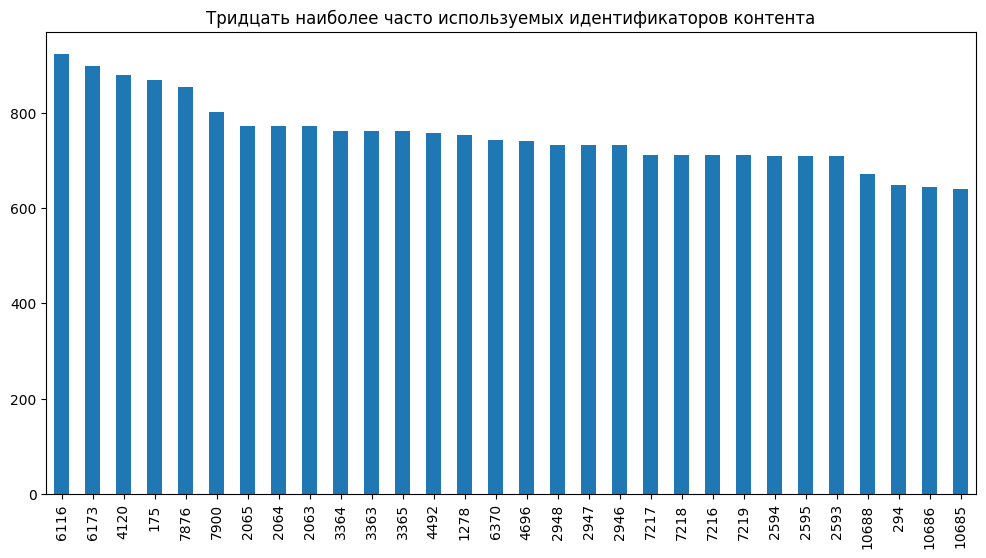

In [24]:
cids = merged_df['content_id'].value_counts()[:30]

fig = plt.figure(figsize=(12,6))
ax = cids.plot.bar()
plt.title("Тридцать наиболее часто используемых идентификаторов контента")
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

#### task_container_id: (int16) Идентификационный код для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти три будут иметь общий идентификатор task_container_id.

In [25]:
print(f'У нас есть {merged_df["task_container_id"].nunique()} уникальных наборов вопросов или лекций.')

У нас есть 7740 уникальных наборов вопросов или лекций.


#### Посмотрим на ответы пользователей

In [26]:
merged_df["user_answer"].value_counts()

 0    138223
 1    133683
 3    129029
 2     89183
-1      9881
Name: user_answer, dtype: int64

#### timestamp: время в миллисекундах между этим пользовательским взаимодействием и первым завершением события от этого пользователя. Как мы видим, большинство взаимодействий происходит от пользователей, которые еще не очень долго были активны на платформе.

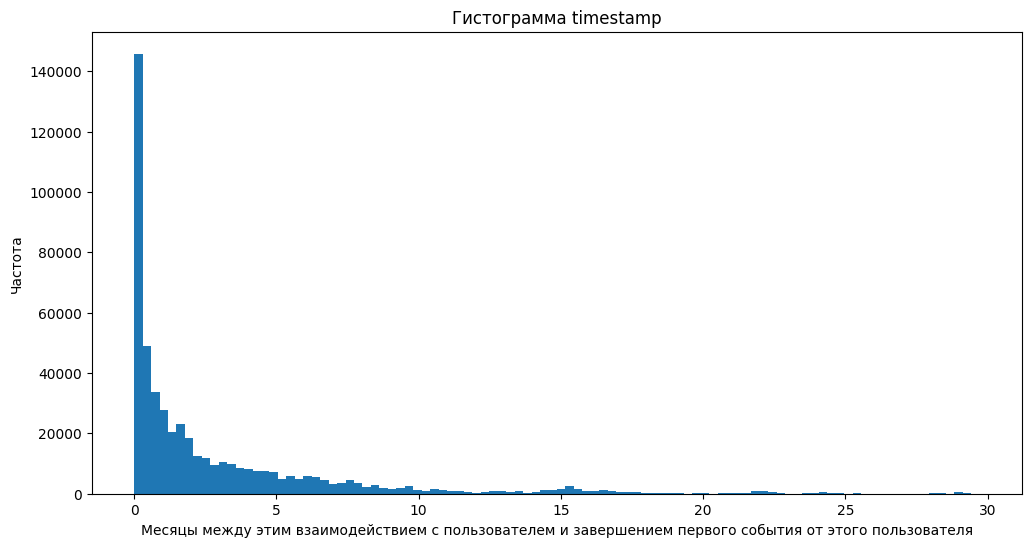

In [27]:
#1 year = 31536000000 ms
ts = merged_df['timestamp']/(31536000000/12)
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100)
plt.title("Гистограмма timestamp")
plt.xticks(rotation=0)
plt.xlabel("Месяцы между этим взаимодействием с пользователем и завершением первого события от этого пользователя")
plt.ylabel("Частота")
plt.show()

#### Посмотрим сколько надо правильных ответов на вопросы

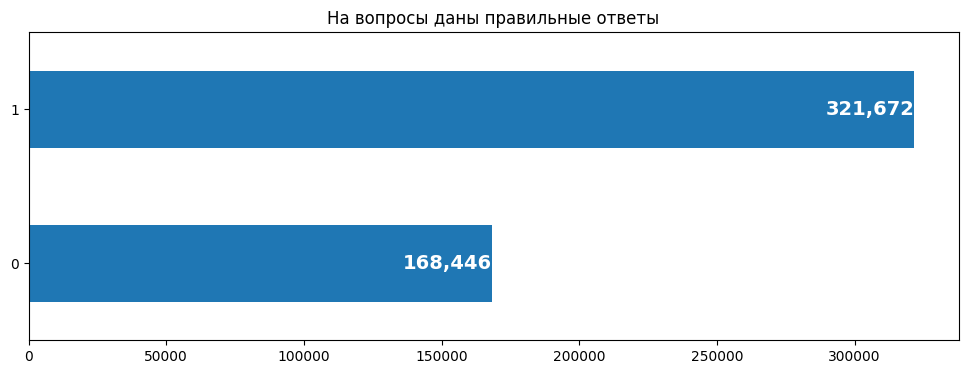

In [28]:
correct = merged_df[merged_df.answered_correctly != -1].answered_correctly.value_counts(ascending=True)
fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("На вопросы даны правильные ответы")
plt.xticks(rotation=0)
plt.show()

#### Проверим есть ли связь между timestamp и answered_correctly. Чтобы выяснить это, я сделал 10 ячеек с отметкой времени. Было замечено, что пользователи, которые зарегистрировались относительно недавно, работают немного хуже, чем пользователи, которые активны дольше.

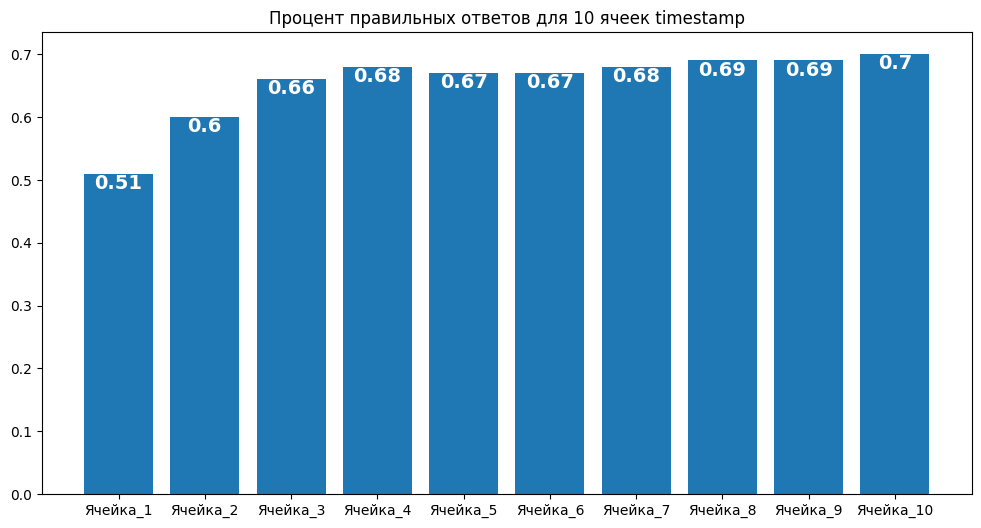

In [29]:
bin_labels_10 = ['Ячейка_1', 'Ячейка_2', 'Ячейка_3', 'Ячейка_4', 'Ячейка_5', 'Ячейка_6', 'Ячейка_7', 'Ячейка_8', 'Ячейка_9', 'Ячейка_10']
merged_df['ts_bin'] = pd.qcut(merged_df['timestamp'], q=10, labels=bin_labels_10)

#make function that can also be used for other fields
def correct(field):
    correct = merged_df[merged_df.answered_correctly != -1].groupby([field, 'answered_correctly'], as_index=False).size()
    correct = correct.pivot(index= field, columns='answered_correctly', values='size')
    correct['Percent_correct'] = round(correct.iloc[:,1]/(correct.iloc[:,0] + correct.iloc[:,1]),2)
    correct = correct.sort_values(by = "Percent_correct", ascending = False)
    correct = correct.iloc[:,2]
    return(correct)

bins_correct = correct("ts_bin")
bins_correct = bins_correct.sort_index()

fig = plt.figure(figsize=(12,6))
plt.bar(bins_correct.index, bins_correct.values)
for i, v in zip(bins_correct.index, bins_correct.values):
    plt.text(i, v, v, color='white', fontweight='bold', fontsize=14, va='top', ha='center')
plt.title("Процент правильных ответов для 10 ячеек timestamp")
plt.xticks(rotation=0)
plt.show()

#### Давайте также проверим, как выглядит распределение answered_correctly, если мы сгруппируем по уникальным идентификаторам task_container_id.

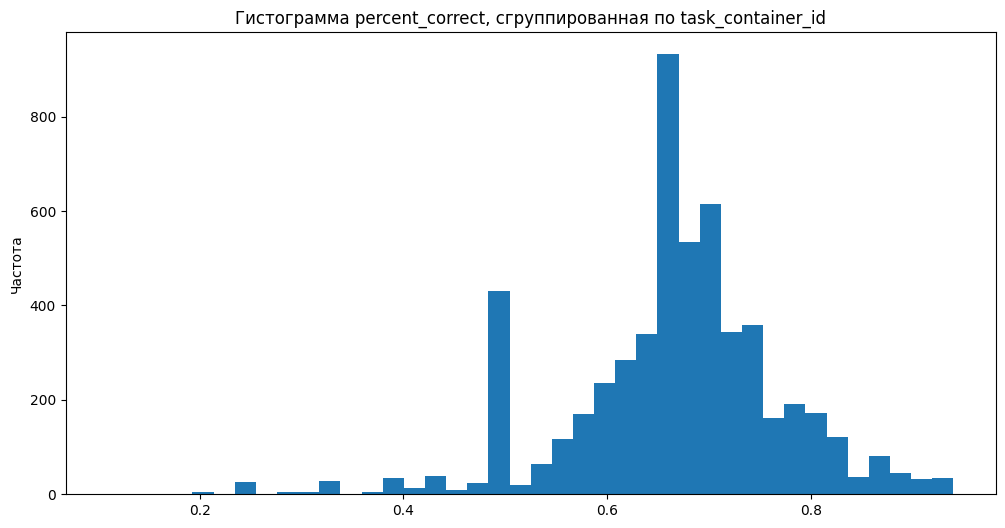

In [30]:
task_id_correct = correct("task_container_id")

fig = plt.figure(figsize=(12,6))
task_id_correct.plot.hist(bins=40)
plt.title("Гистограмма percent_correct, сгруппированная по task_container_id")
plt.xticks(rotation=0)
plt.ylabel("Частота")
plt.show()

#### "Тепловая" карта зависимостей параметров

                   timestamp  content_id  task_container_id  user_answer
timestamp           1.000000    0.027154           0.333749    -0.001144
content_id          0.027154    1.000000           0.065077    -0.109310
task_container_id   0.333749    0.065077           1.000000     0.017830
user_answer        -0.001144   -0.109310           0.017830     1.000000


<AxesSubplot:>

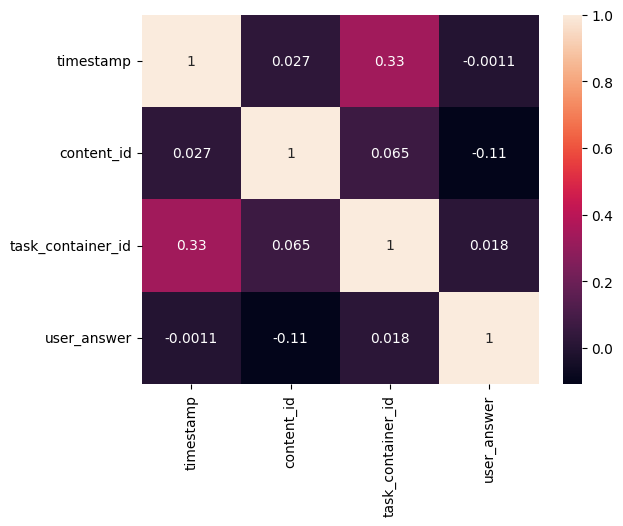

In [31]:
corr_columns = ['timestamp', 'content_id', 'task_container_id', 'user_answer']
corr_matrix = merged_df.loc[:,corr_columns].corr()
print(corr_matrix)


sns.heatmap(corr_matrix, annot=True)

#### Посмотрим на количество ответов пользователя, который ответил на наибольшее количество вопросов

In [32]:
user_percent = merged_df[merged_df.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
print(f"Наибольшее количество вопросов, на которые ответил пользователь {user_percent[user_percent['Answers'] == user_percent.Answers.max()].index[0]}, составляет {user_percent.Answers.max()}")

Наибольшее количество вопросов, на которые ответил пользователь 7171715, составляет 10797


#### Посмотрим на % правильных ответов по сравнению с количеством вопросов, на которые ответил пользователь

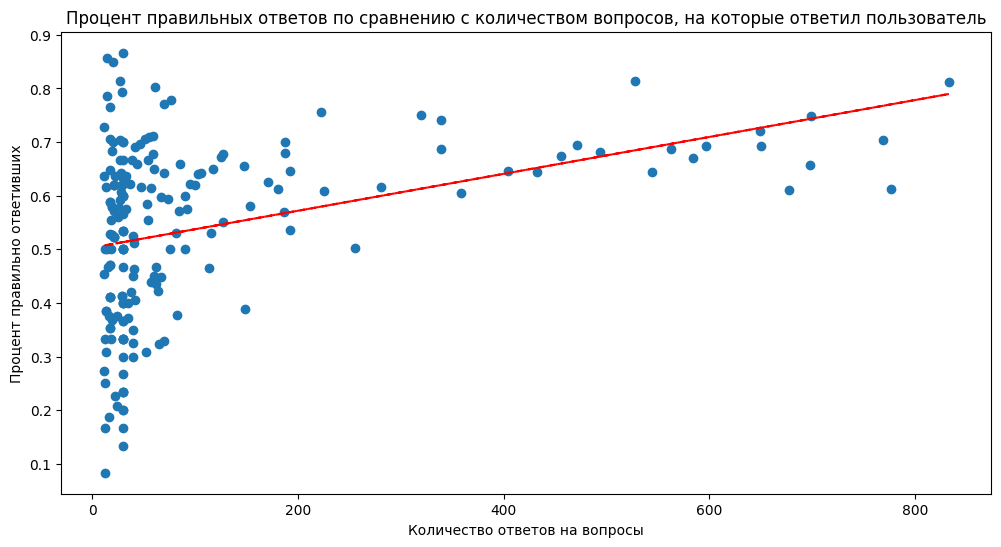

In [33]:
user_percent = user_percent.query('Answers <= 1000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(12,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Процент правильных ответов по сравнению с количеством вопросов, на которые ответил пользователь")
plt.xticks(rotation=0)
plt.xlabel("Количество ответов на вопросы")
plt.ylabel("Процент правильно ответивших")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

#### Посмотрим сколько у нас различных тэгов

In [34]:
merged_df['quest_tags'] = merged_df['quest_tags'].astype(str)

tags = [x.split() for x in merged_df[merged_df.quest_tags != "nan"].quest_tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(f'Мы имеем {len(tags)} различных тэгов')

Мы имеем 188 различных тэгов


#### Посмотрим сколько ответов было правильными и неправильными для каждого вопроса

In [35]:
tags_list = [x.split() for x in merged_df['quest_tags'].values]
merged_df['quest_tags'] = tags_list

correct = merged_df[merged_df.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
correct = correct.pivot(index= "content_id", columns='answered_correctly', values='size')
correct.columns = ['Wrong', 'Right']
correct = correct.fillna(0)
correct[['Wrong', 'Right']] = correct[['Wrong', 'Right']].astype(int)
merged_df = merged_df.merge(correct, left_on = "content_id", right_on = "content_id", how = "left")
merged_df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lect_tag,lect_part,lect_type_of,quest_bundle_id,quest_correct_answer,quest_part,quest_tags,ts_bin,Wrong,Right
0,0,115,5692,False,1,3,1,NaN,<NA>,NaN,NaN,NaN,5692.0,3.0,5.0,[151],Ячейка_1,56.0,122.0
1,56943,115,5716,False,2,2,1,37000.0,False,NaN,NaN,NaN,5716.0,2.0,5.0,[168],Ячейка_1,24.0,87.0
2,118363,115,128,False,0,0,1,55000.0,False,NaN,NaN,NaN,128.0,0.0,1.0,"[131, 149, 92]",Ячейка_1,3.0,86.0
3,131167,115,7860,False,3,0,1,19000.0,False,NaN,NaN,NaN,7860.0,0.0,1.0,"[131, 104, 81]",Ячейка_1,4.0,92.0
4,137965,115,7922,False,4,1,1,11000.0,False,NaN,NaN,NaN,7922.0,1.0,1.0,"[131, 149, 92]",Ячейка_1,5.0,75.0


#### Посмотрим сколько правильных/неправильных ответов по каждому тэгу из всех вопросов

In [36]:
tags_df = pd.DataFrame()
for x in range(len(tags)):
    df = merged_df[merged_df.quest_tags.apply(lambda l: tags[x] in l)]
    df1 = df.agg({'Wrong': ['sum'], 'Right': ['sum']})
    df1['Total_questions'] = df1.Wrong + df1.Right
    df1['Question_ids_with_tag'] = len(df)
    df1['tag'] = tags[x]
    df1 = df1.set_index('tag')
    tags_df = tags_df.append(df1)

tags_df[['Wrong', 'Right', 'Total_questions']] = tags_df[['Wrong', 'Right', 'Total_questions']].astype(int)
tags_df['Percent_correct'] = tags_df.Right/tags_df.Total_questions
tags_df = tags_df.sort_values(by = "Percent_correct", ascending=False)

tags_df.head()

,Wrong,Right,Total_questions,Question_ids_with_tag,Percent_correct
tag,,,,,
68,6257,51154,57411,559,0.891014
187,10526,50189,60715,1193,0.826633
93,133305,611213,744518,2578,0.820951
115,50137,225004,275141,1557,0.817777
149,21663,86109,107772,1948,0.798992


#### Топ-10 самых простых и самых сложных тэгов

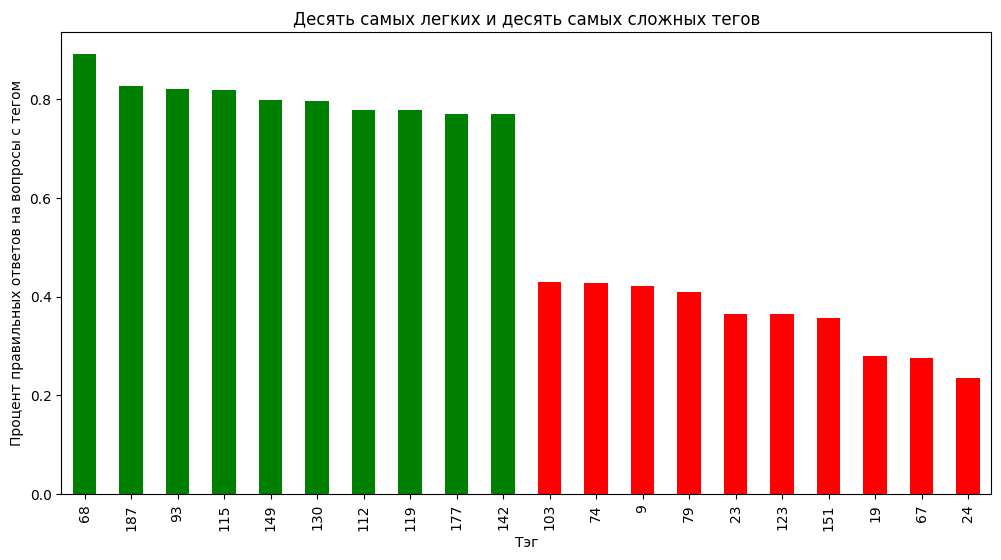

In [37]:
select_rows = list(range(0,10)) + list(range(178, len(tags_df)))
tags_select = tags_df.iloc[select_rows,4]

fig = plt.figure(figsize=(12,6))
x = tags_select.index
y = tags_select.values
clrs = ['red' if y < 0.6 else 'green' for y in tags_select.values]
tags_select.plot.bar(x, y, color=clrs)
plt.title("Десять самых легких и десять самых сложных тегов")
plt.xlabel("Тэг")
plt.ylabel("Процент правильных ответов на вопросы с тегом")
plt.xticks(rotation=90)
plt.show()

#### Топ-30 самых встречаемых тэгов

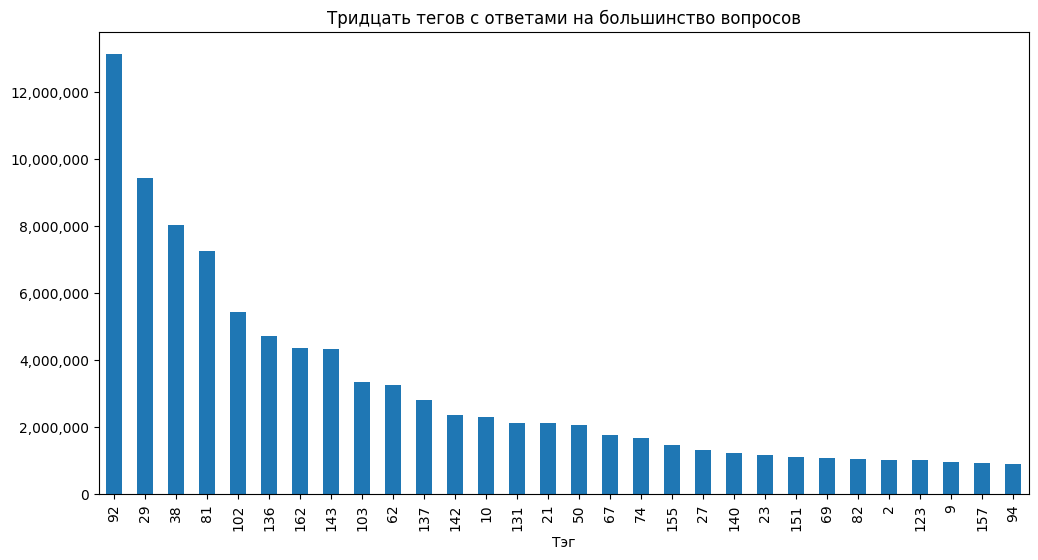

In [38]:
tags_select = tags_df.sort_values(by = "Total_questions", ascending = False).iloc[:30,:]
tags_select = tags_select["Total_questions"]

fig = plt.figure(figsize=(12,6))
ax = tags_select.plot.bar()
plt.title("Тридцать тегов с ответами на большинство вопросов")
plt.xticks(rotation=90)
plt.xlabel('Тэг')
plt.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

#### Изучим с какой частью теста студенты справляются лучше

In [39]:
merged_df.groupby('quest_part')['answered_correctly'].mean().sort_values(ascending=False)

# Получается, что с первой

quest_part
1.0    0.709539
2.0    0.705434
3.0    0.688094
6.0    0.653905
7.0    0.644250
4.0    0.604512
5.0    0.598680
Name: answered_correctly, dtype: float64

#### Посмотрим на типы лекций

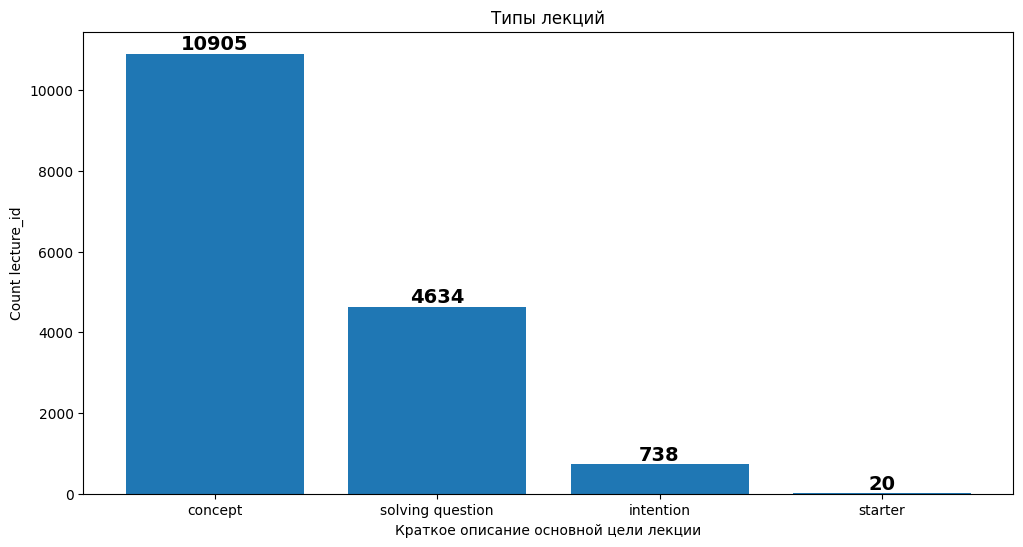

In [40]:
lect_type_of = merged_df.lect_type_of.value_counts()

fig = plt.figure(figsize=(12,6))
plt.bar(lect_type_of.index, lect_type_of.values)
for i, v in zip(lect_type_of.index, lect_type_of.values):
    plt.text(i, v, v, color='black', fontweight='bold', fontsize=14, va='bottom', ha='center')
plt.title("Типы лекций")
plt.xlabel("Краткое описание основной цели лекции")
plt.ylabel("Count lecture_id")
plt.xticks(rotation=0)
plt.show()

#### Посмотрим помогает ли просмотр хотя бы одной лекции студенту отвечать лучше. Как можно заметить, это действительно помогает.

False    1027
True      722
Name: Watches_lecture, dtype: int64


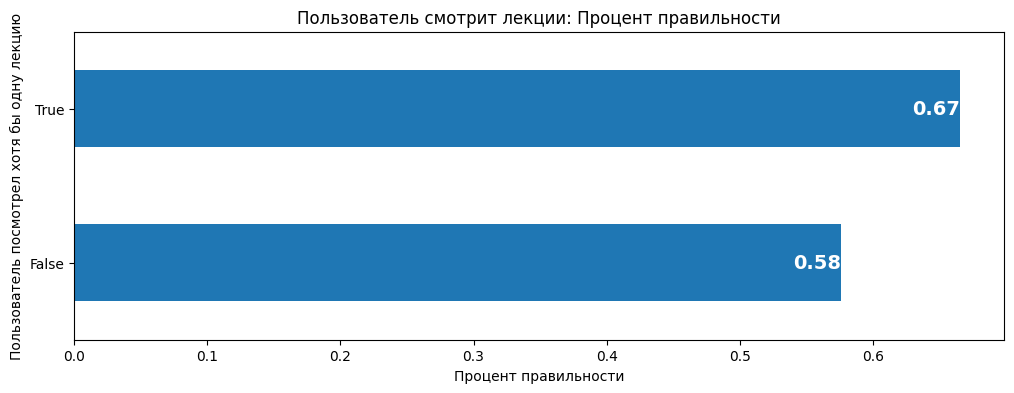

In [41]:
user_lect = merged_df.groupby(["user_id", "answered_correctly"]).size().unstack()
user_lect.columns = ['Lecture', 'Wrong', 'Right']
user_lect['Lecture'] = user_lect['Lecture'].fillna(0)
user_lect = user_lect.astype('Int64')
user_lect['Watches_lecture'] = np.where(user_lect.Lecture > 0, True, False)

watches_l = user_lect.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
print(user_lect.Watches_lecture.value_counts())

watches_l['Percent_correct'] = watches_l.Right/(watches_l.Right + watches_l.Wrong)

watches_l = watches_l.iloc[:,2]

fig = plt.figure(figsize=(12,4))
watches_l.plot.barh()
for i, v in zip(watches_l.index, watches_l.values):
    plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')

plt.title("Пользователь смотрит лекции: Процент правильности")
plt.xlabel("Процент правильности")
plt.ylabel("Пользователь посмотрел хотя бы одну лекцию")
plt.xticks(rotation=0)
plt.show()

#### Создадим таблицу вопросов/ответов

In [42]:
merged_df_quest = merged_df[merged_df.content_type_id == 0]
merged_df_quest = merged_df_quest[merged_df_quest.answered_correctly != -1]

merged_df_quest.drop(['content_type_id','lect_tag', 'lect_part', 'lect_type_of'], axis = 1, inplace = True)
merged_df_quest.dropna(inplace = True)
merged_df_quest.head(3)

,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,quest_bundle_id,quest_correct_answer,quest_part,quest_tags,ts_bin,Wrong,Right
1,56943,115,5716,2,2,1,37000.0,False,5716.0,2.0,5.0,[168],Ячейка_1,24.0,87.0
2,118363,115,128,0,0,1,55000.0,False,128.0,0.0,1.0,"[131, 149, 92]",Ячейка_1,3.0,86.0
3,131167,115,7860,3,0,1,19000.0,False,7860.0,0.0,1.0,"[131, 104, 81]",Ячейка_1,4.0,92.0


In [43]:
merged_df_quest.answered_correctly.value_counts()

1    320451
0    167921
Name: answered_correctly, dtype: int64

#### Проверим правильность заполнения таблиц в полях 'user_answer', 'correct_answer' и 'answered_correctly'


In [44]:
def check_answered_correctly(df):
    if df.loc['user_answer'] == df.loc['quest_correct_answer'] and df.loc['answered_correctly']:
        return True
    if df.loc['user_answer'] != df.loc['quest_correct_answer'] and not df.loc['answered_correctly']:
        return True
    else:
        return False

merged_df_quest['Check_answered_correctly'] = merged_df_quest.apply(check_answered_correctly, axis=1)
merged_df_quest.head(3)


,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,quest_bundle_id,quest_correct_answer,quest_part,quest_tags,ts_bin,Wrong,Right,Check_answered_correctly
1,56943,115,5716,2,2,1,37000.0,False,5716.0,2.0,5.0,[168],Ячейка_1,24.0,87.0,True
2,118363,115,128,0,0,1,55000.0,False,128.0,0.0,1.0,"[131, 149, 92]",Ячейка_1,3.0,86.0,True
3,131167,115,7860,3,0,1,19000.0,False,7860.0,0.0,1.0,"[131, 104, 81]",Ячейка_1,4.0,92.0,True


In [45]:
merged_df_quest['Check_answered_correctly'].value_counts()

# Отсутствие False говорит о том, что ошибок нет. Можно удалить проверочный столбец

True    488372
Name: Check_answered_correctly, dtype: int64

In [46]:
merged_df_quest.drop(['Check_answered_correctly'], axis = 1, inplace = True)

#### Статистика по каждому вопросу

In [47]:
statistics_quest_content_id = merged_df_quest[['content_id', 'answered_correctly']].groupby(['content_id']).agg(['mean'])
statistics_quest_content_id.columns = ['answered_correctly_mean']
statistics_quest_content_id['quest_part'] = merged_df.quest_part

statistics_quest_content_id.sort_values(by=['answered_correctly_mean'], ascending = False)

,answered_correctly_mean,quest_part
content_id,,
11600,1.0,3.0
11797,1.0,1.0
12981,1.0,3.0
12982,1.0,3.0
11834,1.0,3.0
...,...,...
12385,0.0,7.0
12386,0.0,7.0
12387,0.0,6.0


array([[<AxesSubplot:title={'center':'answered_correctly_mean'}>,
        <AxesSubplot:title={'center':'quest_part'}>]], dtype=object)

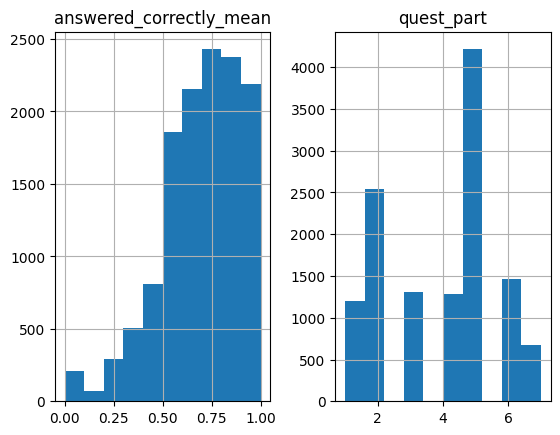

In [48]:
statistics_quest_content_id.hist(align='mid')

#### Вопросы, на которые никто не ответил

In [49]:
lst = list(statistics_quest_content_id[statistics_quest_content_id.answered_correctly_mean == 0].index)
print(f'{len(lst)} вопросов')

# Чтобы посмотреть какие конкретно, нужно раскомментировать следующую строчку
# print(lst)

200 вопросов


#### Вопросы, на которые ответили все

In [50]:
lst = list(statistics_quest_content_id[statistics_quest_content_id.answered_correctly_mean == 1].index)
print(f'{len(lst)} вопросов')

# Чтобы посмотреть какие конкретно, нужно раскомментировать следующую строчку
# print(lst)

1230 вопросов


#### Статистика по каждому пользователю

In [51]:
statistics_quest_user_id = merged_df_quest[['user_id', 'answered_correctly']].groupby(['user_id']).agg(['mean', 'sum', 'count'])
statistics_quest_user_id.columns = ['answered_correctly_mean', 'sum_correct', 'count']
statistics_quest_user_id.sort_values(by=['sum_correct'], ascending = False)

,answered_correctly_mean,sum_correct,count
user_id,,,
1283420,0.828763,6195.0,7475
4421282,0.757293,5270.0,6959
3838215,0.757025,5119.0,6762
9418512,0.608815,4420.0,7260
7051394,0.839583,4344.0,5174
...,...,...,...
1946295,0.500000,1.0,2
4361868,0.166667,1.0,6
8890834,0.100000,1.0,10


<AxesSubplot:xlabel='answered_correctly_mean', ylabel='count'>

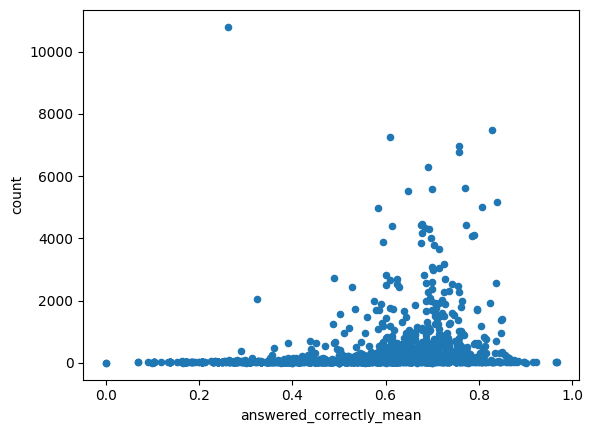

In [52]:
statistics_quest_user_id.plot.scatter(x='answered_correctly_mean', y='count')

# Те пользователи, которые отвечали на все вопросы правильно или же, наоборот, на большинство вопросов неправильно, столнулись с небольшим количеством заданных им вопросов (до 2-х тысяч).

# Те люди, которые ответили на наибольшее число вопросов, имеют "правильность" ответов в диапазоне от 0,6 до 0,9.

#### Пользователи, которые ответили на все вопросы правильно

In [53]:
df = statistics_quest_user_id[statistics_quest_user_id.answered_correctly_mean == 1]
lst = list(df.index)
print(f'{len(lst)} пользователей ответили на все вопросы')

# В моей выборке из 500.000 строк не нашлось таких пользователей

0 пользователей ответили на все вопросы


In [54]:
print(f'Более половины студентов набрали коэффициент правильности ответов, равный \
{round(statistics_quest_user_id.answered_correctly_mean.quantile(0.75), 2)}')

Более половины студентов набрали коэффициент правильности ответов, равный 0.67


In [55]:
had_explanation_quest_user_id = merged_df_quest[['user_id', 'prior_question_had_explanation']].groupby(['user_id']).agg(['sum']).sort_values(by=['user_id'])
had_explanation_quest_user_id.columns = ['explanation_sum']
had_explanation_quest_user_id.head(10)

,explanation_sum
user_id,
115,6
124,0
2746,11
5382,113
8623,96
8701,9
12741,250
13134,1233
24418,6251


In [56]:
statistics_quest_user_id = statistics_quest_user_id.merge(had_explanation_quest_user_id, how='left', left_on='user_id', right_on='user_id')
statistics_quest_user_id.head(10)

,answered_correctly_mean,sum_correct,count,explanation_sum
user_id,,,,
115,0.688889,31.0,45,6
124,0.206897,6.0,29,0
2746,0.611111,11.0,18,11
5382,0.669355,83.0,124,113
8623,0.638889,69.0,108,96
8701,0.562500,9.0,16,9
12741,0.575758,152.0,264,250
13134,0.706119,877.0,1242,1233
24418,0.690385,4337.0,6282,6251


<AxesSubplot:xlabel='explanation_sum', ylabel='sum_correct'>

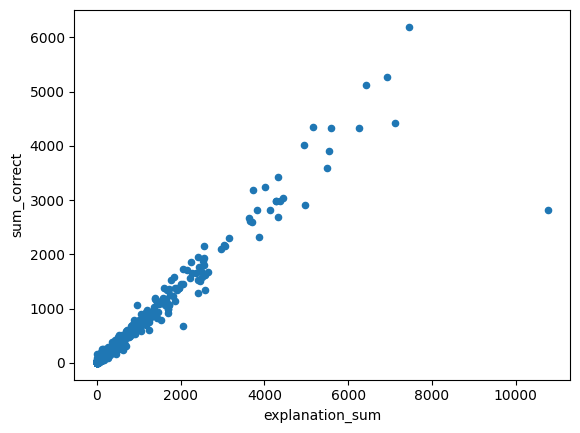

In [57]:
statistics_quest_user_id.plot(x='explanation_sum', y='sum_correct',  kind = 'scatter')

#### С увеличением числа объяснений наблюдается рост правильных ответов каждого студента

<AxesSubplot:xlabel='explanation_sum', ylabel='count'>

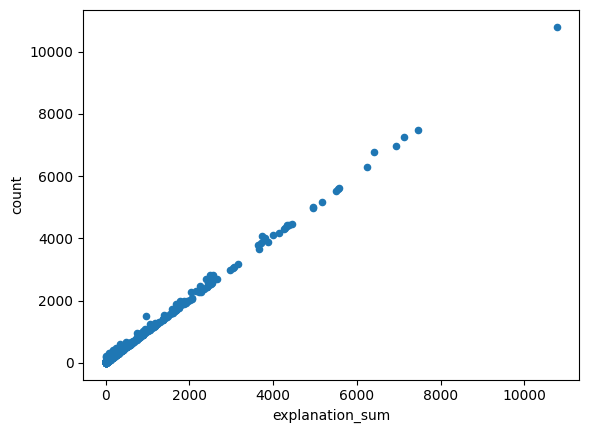

In [58]:
statistics_quest_user_id.plot(x='explanation_sum', y='count',  kind = 'scatter')

#### Чем больше пользователь отвечает на вопросы, тем больше смотрит "объяснения"

<AxesSubplot:xlabel='answered_correctly_mean', ylabel='explanation_sum'>

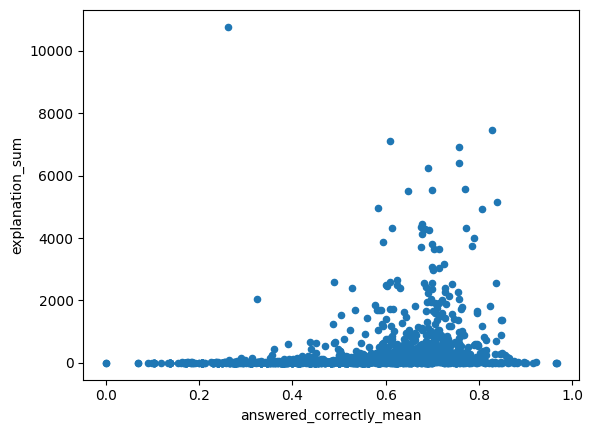

In [59]:
statistics_quest_user_id.plot(y='explanation_sum', x='answered_correctly_mean',  kind = 'scatter')

# График повторяет зависимость answered_correctly_mean и count. То есть чем больше задано вопросов, тем больше просмотрено "объяснений"